# Importations 


In [1]:
from utils.utils_dq import * 
%matplotlib inline

### Load the environment and results from q learning algorithm

In [2]:
# Load the environment 
with open('./check/env.pickle', 'rb') as f:
    env = pickle.load(f)


In [3]:
# Load the q_tables for gamma = 0 and gamma = 0.9
with open('./check/q_tables_q_learning_0.pickle', 'rb') as f:
    [q_table_q,q_table_q1] = pickle.load(f)

with open('./check/q_tables_q_learning_09.pickle', 'rb') as f:
    [q_table_q09,q_table_q109] = pickle.load(f)
    
with open('./check/q_learning_rewards_0.pickle', 'rb') as f:
    [all_reward_q0,all_reward_q10] = pickle.load(f)
    
with open('./check/q_learning_rewards_09.pickle', 'rb') as f:
    [all_reward_q09,all_reward_q109] = pickle.load(f)
    
    


In [4]:
tables_q_learning = [q_table_q,q_table_q1,q_table_q09,q_table_q109]

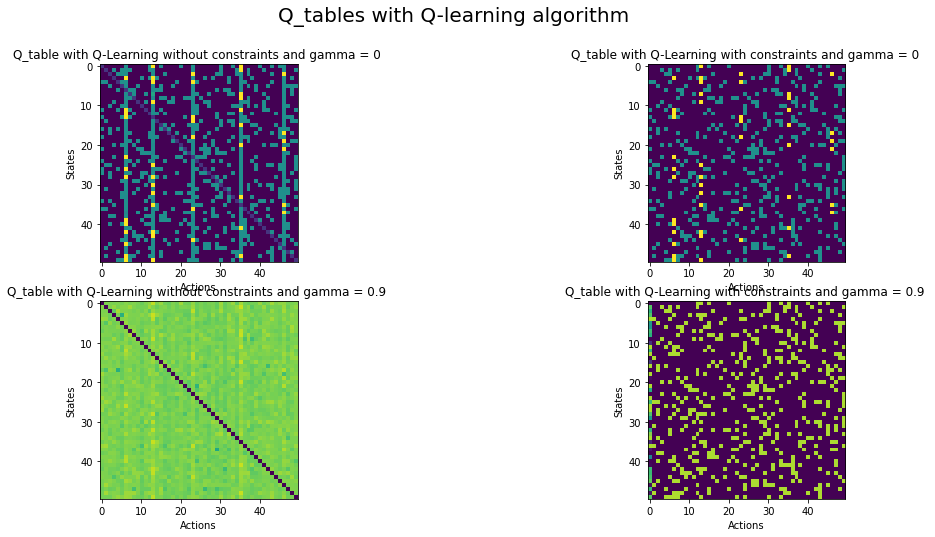

In [5]:
names = ['Q_table with Q-Learning without constraints and gamma = 0 ',\
         'Q_table with Q-Learning with constraints and gamma = 0 ' ,\
        'Q_table with Q-Learning without constraints and gamma = 0.9 ',\
         'Q_table with Q-Learning with constraints and gamma = 0.9 ' ]

f, axs = plt.subplots(2,2,figsize=(18,8))
axs = axs.reshape(-1,1)
    
for i in range(len(axs)) : 

    axs[i][0].imshow(tables_q_learning[i],cmap='viridis', vmin=0, vmax=2)
    axs[i][0].set_xlabel('Actions')
    axs[i][0].set_ylabel('States')
    axs[i][0].set_title(names[i])
        
        

plt.suptitle('Q_tables with Q-learning algorithm ', size=20)    
        
plt.show()

## Reward matrix

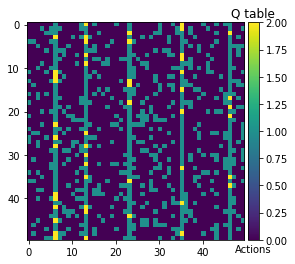

In [6]:
plot_q_table(get_matrix_rewards(env))

## Rewards with Q learning algorithm

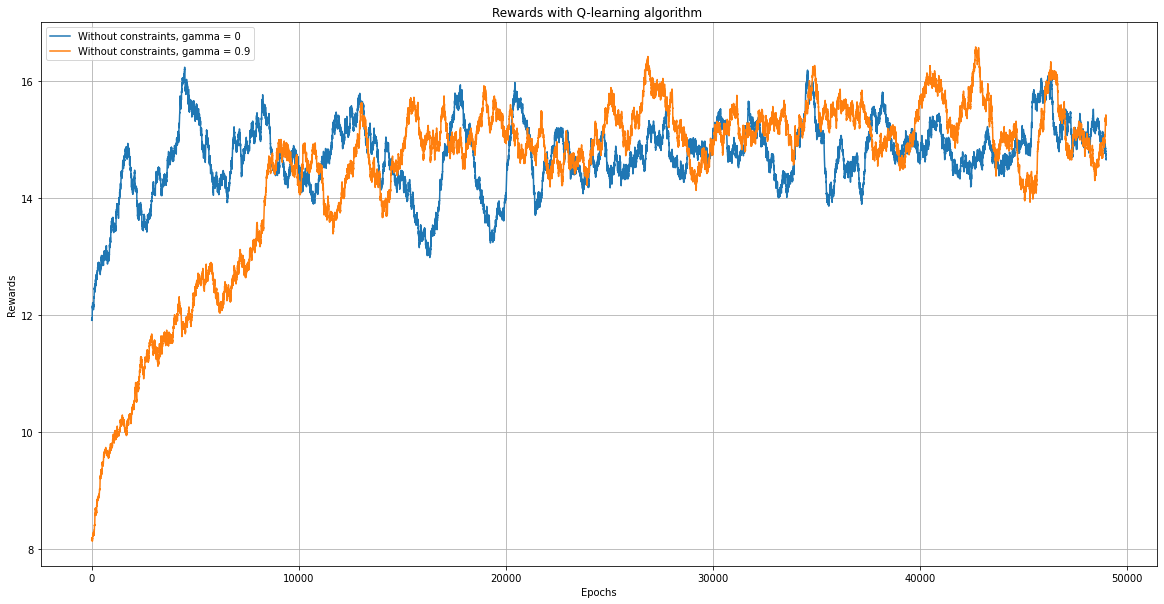

In [7]:
f, axs = plt.subplots(1,1,figsize=(20,10))

# plt.plot( running_mean(all_reward_q0,1000), label ='With constraints, gamma = 0' )
plt.plot( running_mean(all_reward_q10,1000) , label ='Without constraints, gamma = 0')
# plt.plot( running_mean(all_reward_q09,1000), label ='With constraints, gamma = 0.9 ' )
plt.plot( running_mean(all_reward_q109,1000) , label ='Without constraints, gamma = 0.9')

plt.xlabel('Epochs')
plt.ylabel('Rewards')
plt.title('Rewards with Q-learning algorithm ')
plt.legend()
plt.grid(True)
plt.show()


# Linear Model

In [8]:
# Parameters for the deep Q learning algorithm
param_deep_Q = {
    'env' : env,\
    'state_dim' : None ,\
    'name_conversion_state' : None,\
    'mem_size': 50,\
    'gamma' : 0 ,\
    'epsilon' : 0.1,\
    'learning_rate' : 5e-3,\
    'max_iter' : 10 , \
    'batch_size' : 10 ,
    'name' : 'test_model',\
    'model' : LinearModel(1,CATALOGUE_SIZE),\
    'constraints' : False,
    'optimizer' : 'SGD'
}


In [9]:
with open('./check/linear_gamma_0.pickle', 'rb') as f:
    dict_results_linear = pickle.load(f)

In [10]:
# get_result_tables(param_deep_Q, dict_results_linear, names = ['hot_encoding','u_hot','valuable','rewards'],epochs = epochs)

# Loss and rewards for linear model for 10 000 epochs, SGD (learning rate = 5e-3)

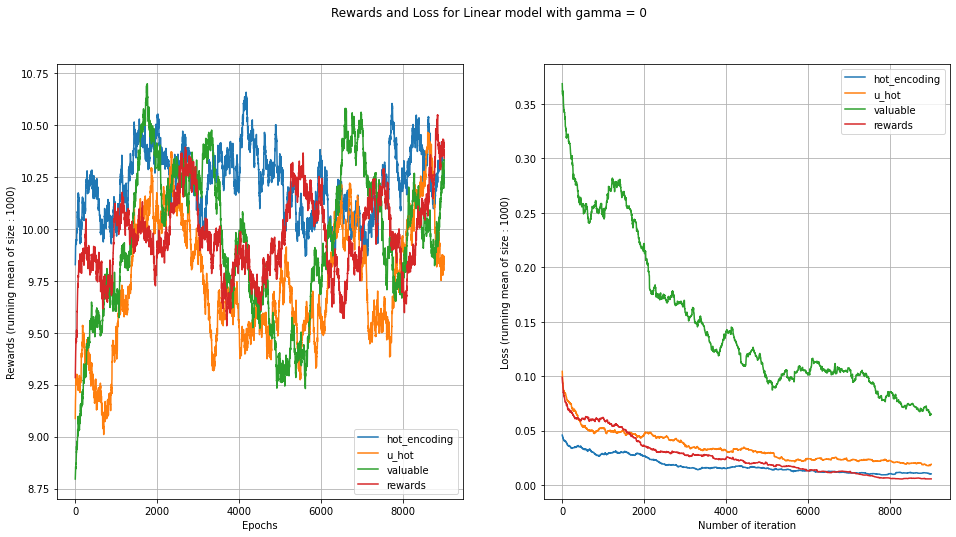

In [11]:
plot_results_loss_rew_dic(dict_results_linear, names = ['hot_encoding','u_hot','valuable','rewards'], rm_rew = 1000, rm_loss = 1000, gamma = 0 )

# Q tables for linear model for 10 000 epochs, SGD (learning rate = 5e-3)

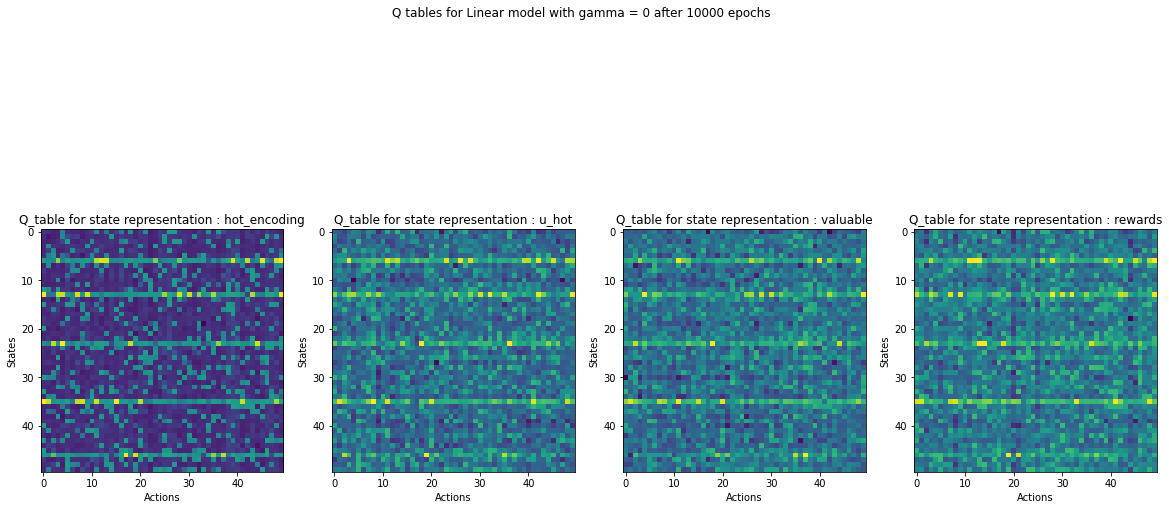

In [12]:
compare_q_tables_dic(dict_results_linear,names = ['hot_encoding','u_hot','valuable','rewards'] , gamma = 0 , isLinear = True) 

# Transpoe of the q tables

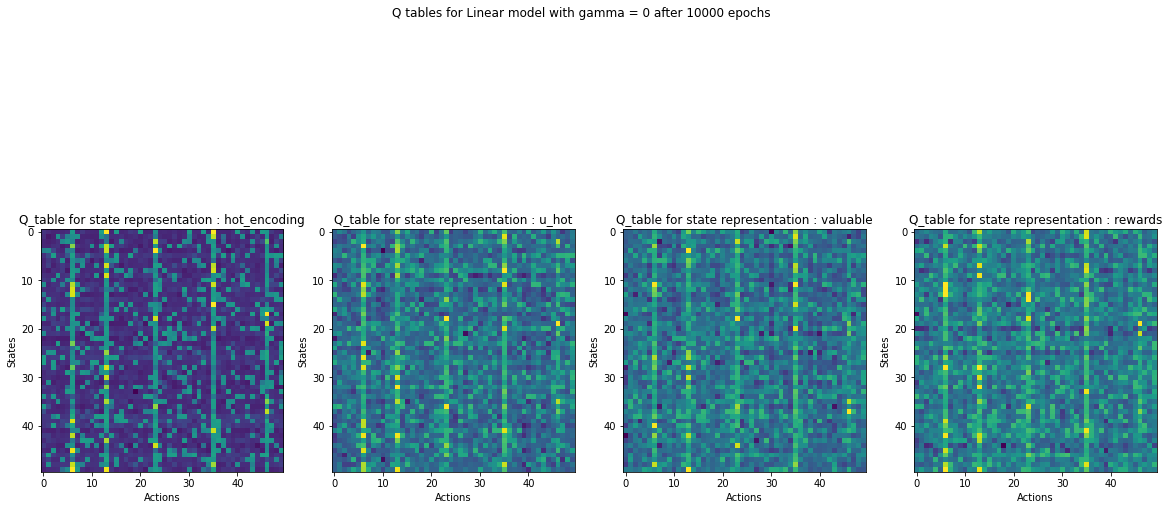

In [13]:
compare_q_tables_dic(dict_results_linear,names = ['hot_encoding','u_hot','valuable','rewards'] , gamma = 0 , isLinear = True, tranpose = True) 

In [14]:
# with open('check/linear_gamma_0.pickle', 'wb') as f:
#     pickle.dump(dict_results_linear, f)

In [15]:
# Parameters for the deep Q learning algorithm
param_deep_Q = {
    'env' : env,\
    'state_dim' : None ,\
    'name_conversion_state' : None,\
    'mem_size': 50,\
    'gamma' : 0.9 ,\
    'epsilon' : 0.1,\
    'learning_rate' : 5e-6,\
    'max_iter' : 10 , \
    'batch_size' : 10 ,
    'name' : 'test_model',\
    'model' : LinearModel(1,CATALOGUE_SIZE),\
    'constraints' : True,
    'optimizer' : 'SGD'
}


In [16]:
# with open('check/dict_results_linear_09.pickle', 'wb') as f:
#     pickle.dump(dict_results_linear_09, f)

In [18]:
with open('./check/dict_results_linear_09.pickle', 'rb') as f:
    dict_results_linear_09 = pickle.load(f)

In [19]:
# get_result_tables(param_deep_Q, dict_results_linear_09, names = ['hot_encoding', 'u_hot','rewards','valuable'],epochs = epochs)

# Loss and rewards for linear model for 5000 epochs, SGD (learning rate = 5e-6) and gamma = 0.9

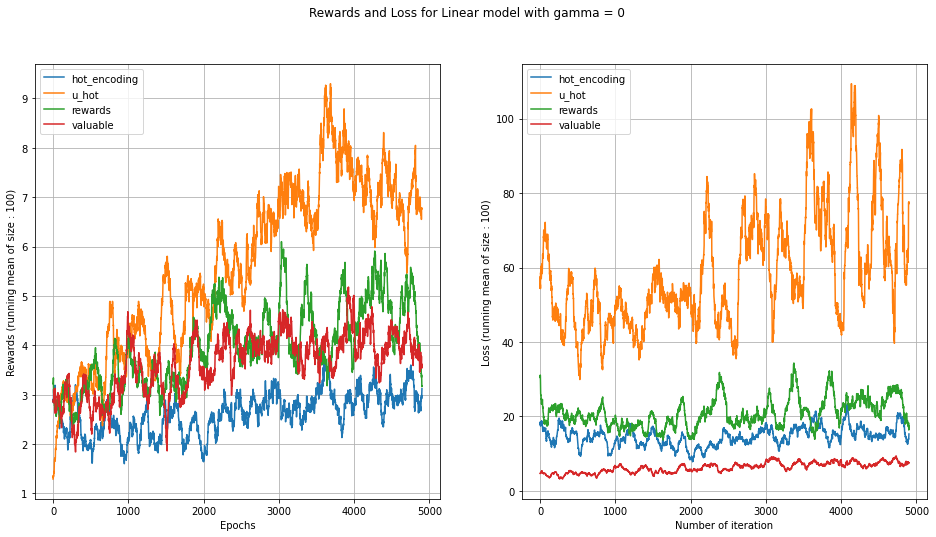

In [20]:
plot_results_loss_rew_dic(dict_results_linear_09, names = ['hot_encoding','u_hot','rewards','valuable'], rm_rew = 100, rm_loss = 100, gamma = 0 )

# Q tables for linear model for 5000 epochs, SGD (learning rate = 5e-6) and gamma = 0.9

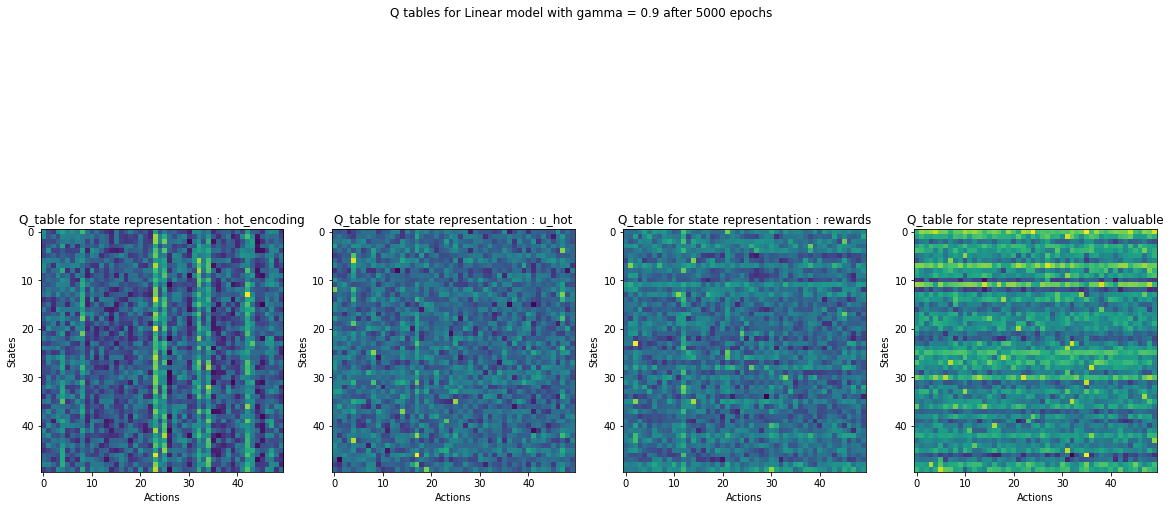

In [21]:
compare_q_tables_dic(dict_results_linear_09,names = ['hot_encoding','u_hot','rewards','valuable'] , gamma = 0.9 , isLinear = True) 

In [22]:
# with open('check/dict_results_linear_09.pickle', 'wb') as f:
#     pickle.dump(dict_results_linear_09, f)

# Fully connected method

## 1. Gamma = 0, Adam optimizer and learning rate = 5e-4 

In [23]:
# Parameters for the deep Q learning algorithm
param_deep_Q = {
    'env' : env,\
    'state_dim' : None ,\
    'name_conversion_state' : None,\
    'mem_size': 50,\
    'gamma' : 0 ,\
    'epsilon' : 0.1,\
    'learning_rate' : 5e-4,\
    'max_iter' : 10 , \
    'batch_size' : 10 ,
    'name' : 'test_model',\
    'model' : None,\
    'constraints' : False,
    'optimizer' : 'Adam'
}


In [24]:
with open('./check/dict_results_fc.pickle', 'rb') as f:
    dict_results_fc = pickle.load(f)

In [25]:
# get_result_tables(param_deep_Q, dict_results_fc, names = ['valuable', 'hot_encoding','u_hot','rewards'],epochs = epochs, linear = False)

# Loss and rewards for fully connected model for 10 000 epochs, Adam (learning rate = 5e-4)

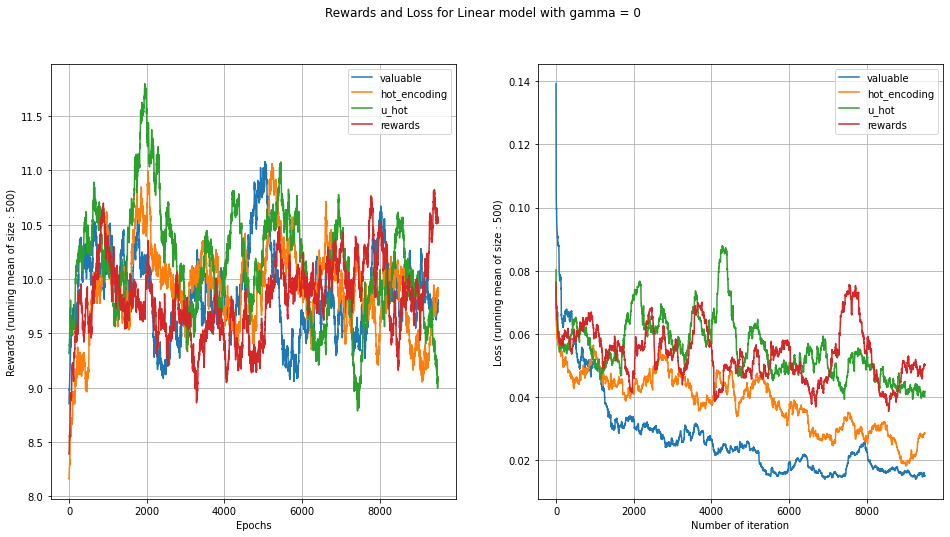

In [26]:
plot_results_loss_rew_dic(dict_results_fc, names = ['valuable', 'hot_encoding','u_hot','rewards'], rm_rew = 500, rm_loss = 500, gamma = 0 )

# Q tables for fully connected model for 10 000 epochs, Adam (learning rate = 5e-4)

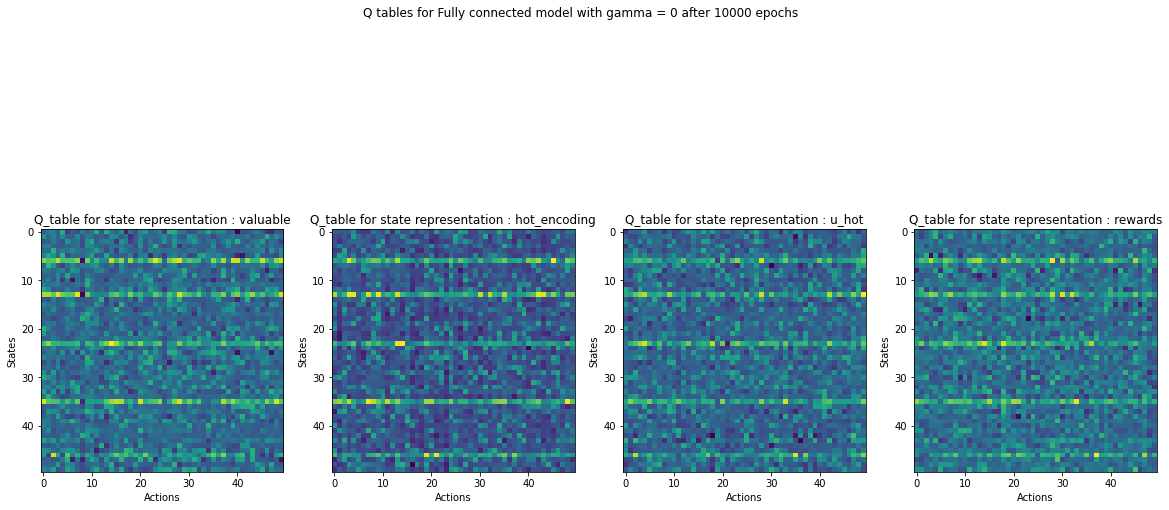

In [27]:
compare_q_tables_dic(dict_results_fc,names = ['valuable', 'hot_encoding','u_hot','rewards'] , gamma = 0 , isLinear = False) 

# Tranposed Q tables for fully connected model for 10 000 epochs, Adam (learning rate = 5e-4)

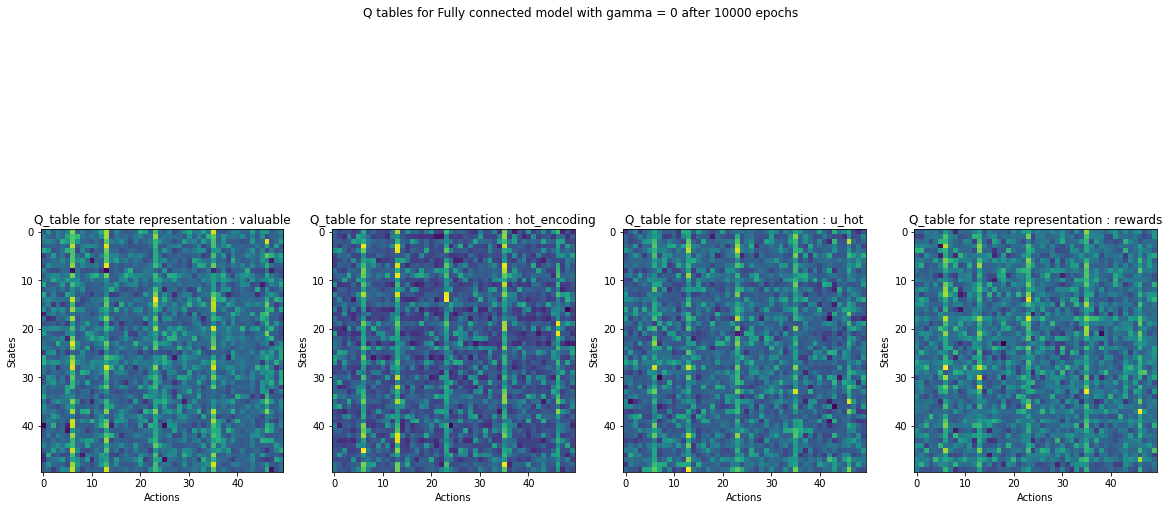

In [28]:
compare_q_tables_dic(dict_results_fc,names = ['valuable', 'hot_encoding','u_hot','rewards'] , gamma = 0 , isLinear = False, tranpose= True) 

In [29]:
# with open('check/dict_results_fc.pickle', 'wb') as f:
#     pickle.dump(dict_results_fc, f)

## 2. Gamma = 0.9, SGD optimizer and learning rate = 1e-4

In [30]:
# Parameters for the deep Q learning algorithm
param_deep_Q = {
    'env' : env,\
    'state_dim' : None ,\
    'name_conversion_state' : None,\
    'mem_size': 200,\
    'gamma' : 0.9 ,\
    'epsilon' : 0.1,\
    'learning_rate' : 1e-4,\
    'max_iter' : 10 , \
    'batch_size' : 10 ,
    'name' : 'test_model',\
    'model' : None,\
    'constraints' : False,
    'optimizer' : 'SGD'
}


In [31]:
names = ['valuable','hot_encoding','u_hot','rewards']

In [32]:
with open('./check/dict_results_fc_09_sgd.pickle', 'rb') as f:
    dict_results_fc_09_sgd = pickle.load(f)

In [33]:
# get_result_tables(param_deep_Q, dict_results_fc_09, names = names,epochs = epochs, linear = False)

# Rewards and Loss for fully connected model for 10 000 epochs, SGD (learning rate = 1e-4) and gamma = 0.9

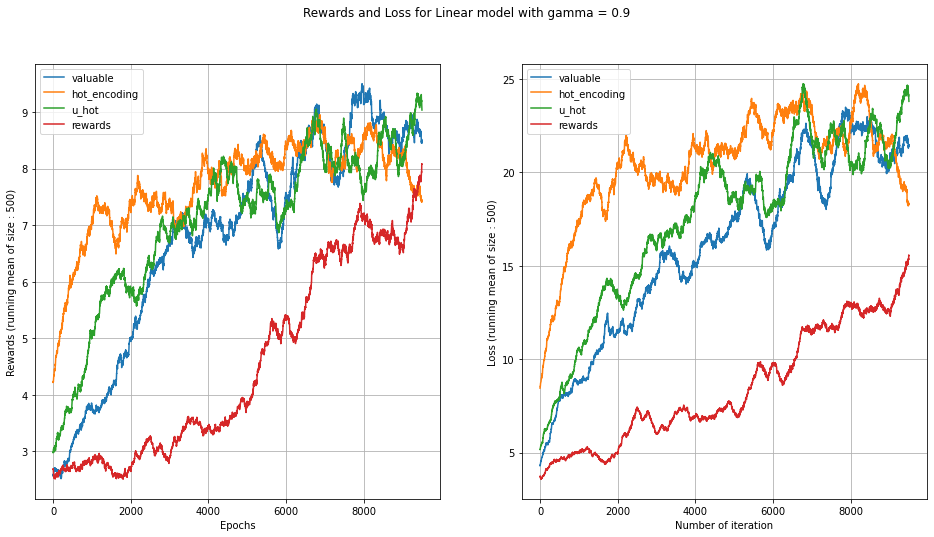

In [34]:
plot_results_loss_rew_dic(dict_results_fc_09_sgd, names =names, rm_rew = 500, rm_loss = 500, gamma = 0.9 )

# Q tables for fully connected model for 10 000 epochs, SGD (learning rate = 1e-4) and gamma = 0.9

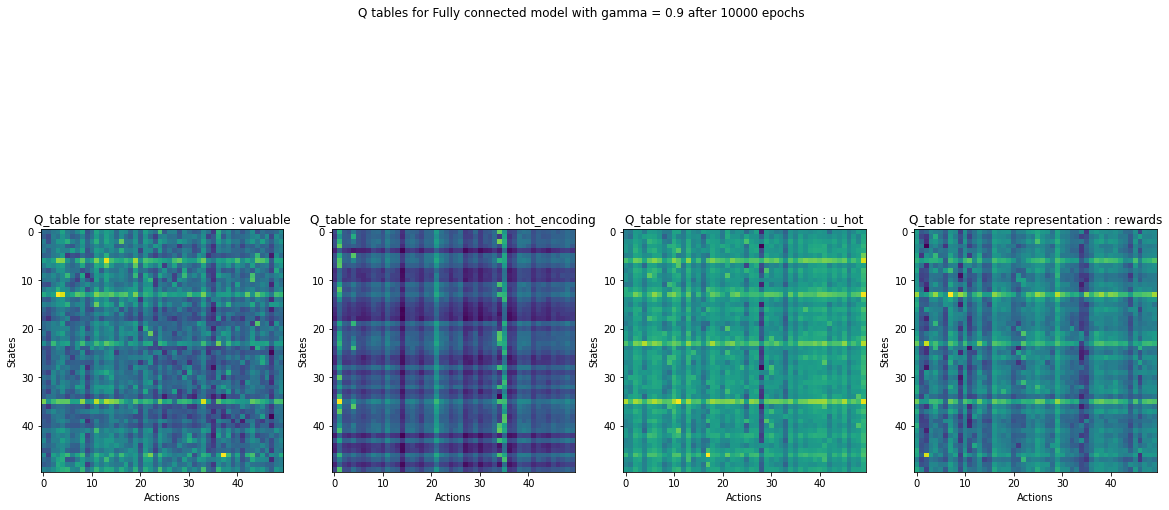

In [35]:
compare_q_tables_dic(dict_results_fc_09_sgd,names = names, gamma = 0.9 , isLinear = False) 

# Transposed Q tables for fully connected model for 10 000 epochs, SGD (learning rate = 1e-4) and gamma = 0.9

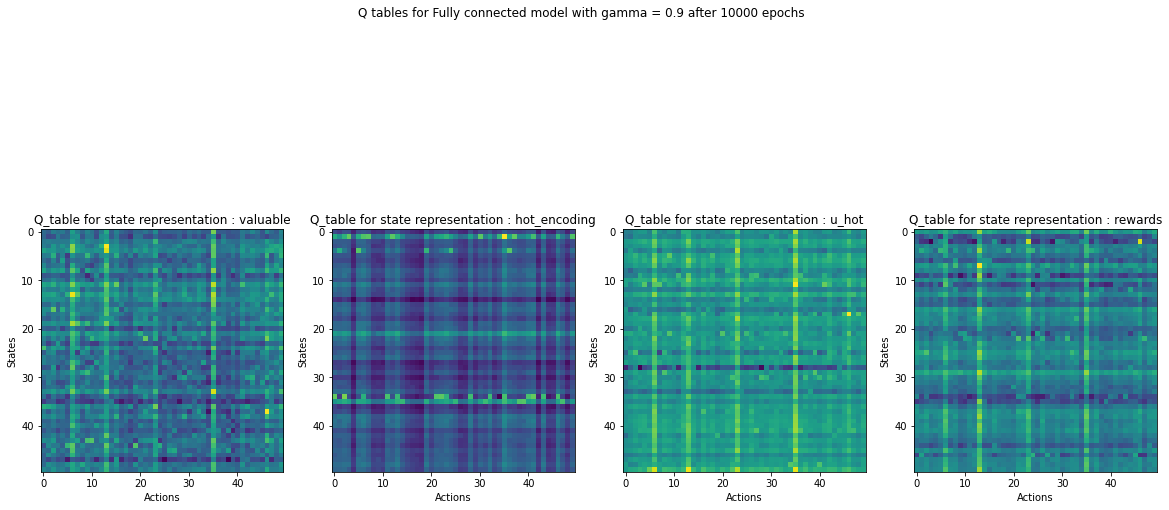

In [36]:
compare_q_tables_dic(dict_results_fc_09_sgd,names = names, gamma = 0.9 , isLinear = False, tranpose = True) 

## Q table after Q learning algorithm (gamma = 0.9)

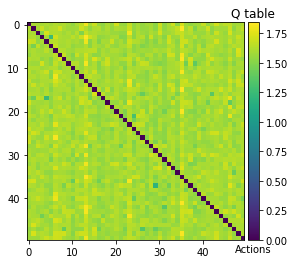

In [37]:
plot_q_table(tables_q_learning[2])

## Tranpose Q table with fully connected model with 'Valuable' state 

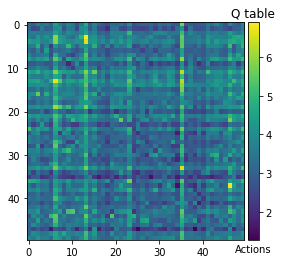

In [38]:
plot_q_table(dict_results_fc_09_sgd['valuable'][0][-1].detach().numpy().T)

## 2. Gamma = 0.9, Adam optimizer and learning rate = 1e-5

In [40]:
# Parameters for the deep Q learning algorithm
param_deep_Q = {
    'env' : env,\
    'state_dim' : None ,\
    'name_conversion_state' : None,\
    'mem_size': 200,\
    'gamma' : 0.9 ,\
    'epsilon' : 0.4,\
    'learning_rate' : 1e-5,\
    'max_iter' : 10 , \
    'batch_size' : 20 ,
    'name' : 'test_model',\
    'model' : None,\
    'constraints' : False,
    'optimizer' : 'Adam'
}


In [41]:
names = ['valuable','hot_encoding','u_hot','rewards']

In [42]:
with open('./check/dict_results_fc_09_adam.pickle', 'rb') as f:
    dict_results_fc_09_adam = pickle.load(f)

In [33]:
# get_result_tables(param_deep_Q, dict_results_fc_09, names = names,epochs = epochs, linear = False)

# Rewards and Loss for fully connected model for 5 000 epochs, Adam (learning rate = 1e-5) and gamma = 0.9

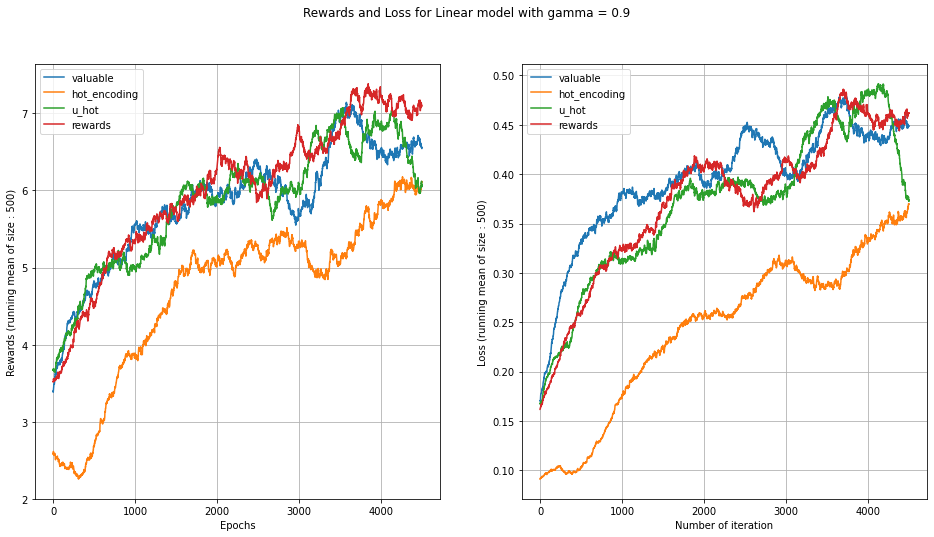

In [43]:
plot_results_loss_rew_dic(dict_results_fc_09_adam, names =names, rm_rew = 500, rm_loss = 500, gamma = 0.9 )

# Q tables for fully connected model for 5 000 epochs, Adam (learning rate = 1e-5) and gamma = 0.9

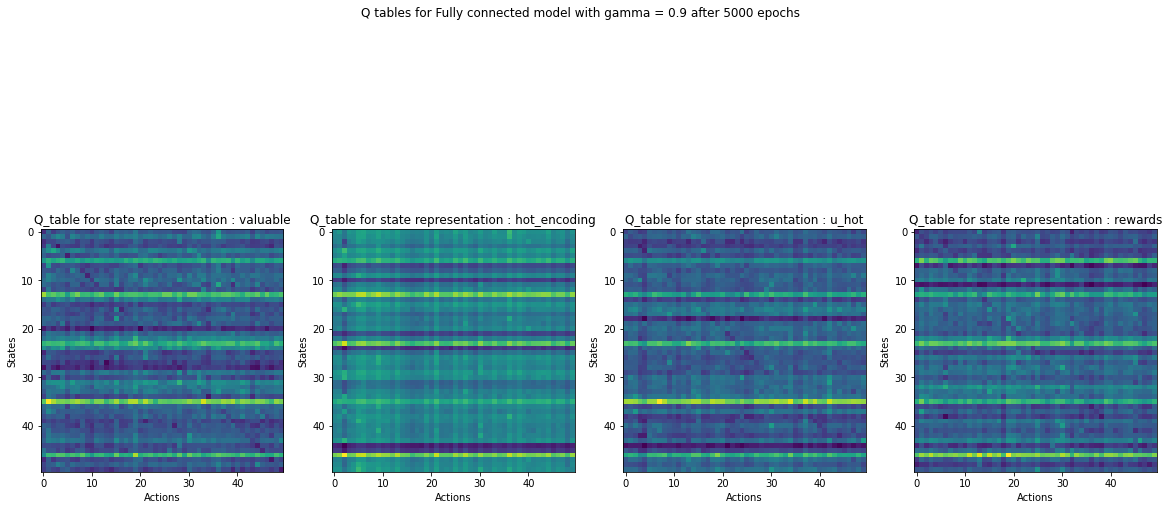

In [44]:
compare_q_tables_dic(dict_results_fc_09_adam,names = names, gamma = 0.9 , isLinear = False) 

# Transposed Q tables for fully connected model for 5 000 epochs, Adam (learning rate = 1e-5) and gamma = 0.9

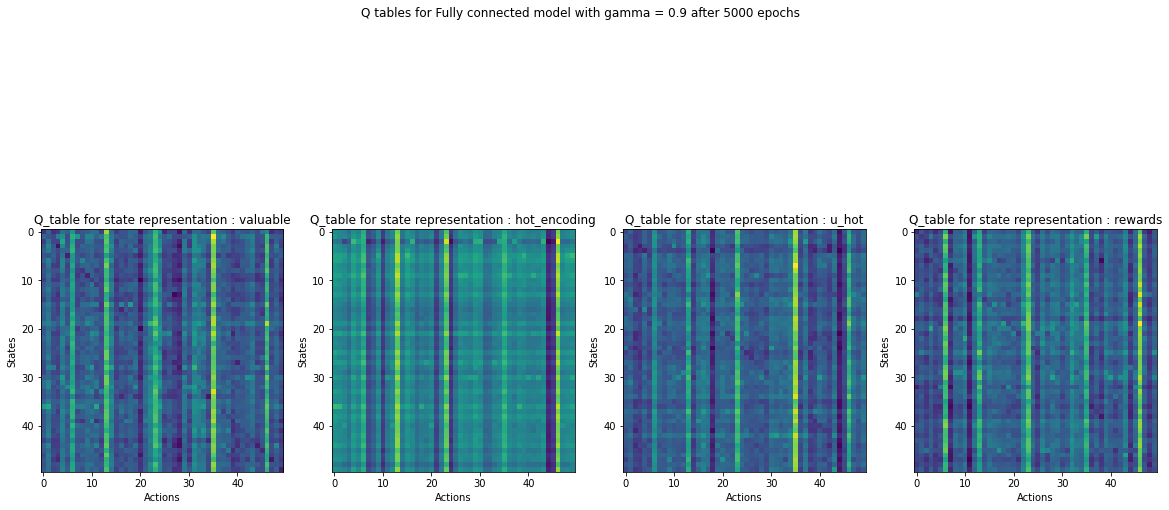

In [45]:
compare_q_tables_dic(dict_results_fc_09_adam,names = names, gamma = 0.9 , isLinear = False, tranpose = True) 

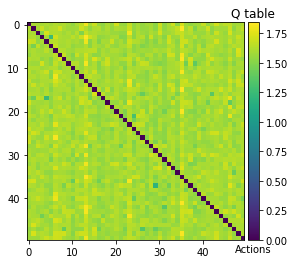

In [37]:
plot_q_table(tables_q_learning[2])